# The testbench model with manually measured parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy.linalg as LA
from scipy.signal import lsim, dlsim
import opentorsion as ot
import cvxpy as cp

In [2]:
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (6,4)

In [3]:
def testbench():
    '''
    Kongsberg testbench model based on parameters from Manngård et al. (2022).
    '''
    shafts = []
    disks = []
    gears = []

    disks.append(ot.Disk(0, I=6.5e-4))
    shafts.append(ot.Shaft(0, 1, 0, 0, k=1.9039e5, I=1.4420e-4, c=8.0804)) # driving motor, coupling
    shafts.append(ot.Shaft(1, 2, 0, 0, k=6.9487e3, I=3.7880e-6, c=0.2949)) # shaft
    shafts.append(ot.Shaft(2, 3, 0, 0, k=90, I=3e-6, c=0.2387)) # elastomer coupling hub
    shafts.append(ot.Shaft(3, 4, 0, 0, k=90, I=2e-6, c=0.2387)) # elastomer coupling middle piece
    shafts.append(ot.Shaft(4, 5, 0, 0, k=90, I=0, c=0.2387)) # elastomer coupling hubs & shaft
    disks.append(ot.Disk(5, I=7.8091e-3))
    shafts.append(ot.Shaft(5, 6, 0, 0, k=90, I=2e-6, c=0.2387))# elastomer coupling middle piece
    shafts.append(ot.Shaft(6, 7, 0, 0, k=90, I=0, c=0.0013)) # elastomer coupling hub & shaft
    shafts.append(ot.Shaft(7, 8, 0.342e3, 0.008e3, G=80e9, rho=7800)) # new shaft (shaft & coupling)
    shafts.append(ot.Shaft(8, 9, 0, 0, k=5.4e3, I=6.5e-6, c=0.2292)) # torque transducer
    shafts.append(ot.Shaft(9, 10, 0, 0, k=4.19e4, I=5.65e-5, c=1.7783)) # torque transducer & coupling
    shafts.append(ot.Shaft(10, 11, 0, 0, k=1.2192e3, I=4.2685e-6, c=0.5175)) # shaft
    gear1 = ot.Gear(11, I=3.2467e-4, R=3)
    gears.append(gear1) # shaft & gear
    gears.append(ot.Gear(12, I=0, R=1, parent=gear1))
    shafts.append(ot.Shaft(12, 13, 0, 0, k=3.1e4, I=1.2e-4, c=1.3157)) # coupling
    shafts.append(ot.Shaft(13, 14, 0, 0, k=1.1429e3, I=1.1516e-5, c=0.0485)) # shaft
    shafts.append(ot.Shaft(14, 15, 0, 0, k=3.1e4, I=1.3152e-4, c=1.3157)) # shaft & coupling
    shafts.append(ot.Shaft(15, 16, 0, 0, k=1.2192e4, I=4.2685e-6, c=0.5175)) # shaft
    gear2 = ot.Gear(16, I=2.6927e-4, R=4)
    gears.append(gear2) # shaft & gear
    gears.append(ot.Gear(17, I=0, R=1, parent=gear2))
    shafts.append(ot.Shaft(17, 18, 0, 0, k=1.38e5, I=1.8e-4, c=5.8569)) # coupling
    shafts.append(ot.Shaft(18, 19, 0, 0, k=2e4, I=2e-5, c=0.8488)) # torque transducer
    shafts.append(ot.Shaft(19, 20, 0, 0, k=1.38e5, I=2e-4, c=5.8569)) # torque trandsucer & coupling
    shafts.append(ot.Shaft(20, 21, 0, 0, k=1.2192e4, I=4.2685e-6, c=0.5175)) # shaft
    disks.append(ot.Disk(21, I=4.9535e-2)) # shaft, mass, planetary gear & load generator

    assembly = ot.Assembly(shafts, disk_elements=disks, gear_elements=gears)
    _, f, _ = assembly.modal_analysis()
    print(f.round(2))

    return assembly

In [4]:
def testbench_demoday():
    '''
    Kongsberg testbench model with measured component dimensions.
    '''
    shafts, disks, gears = [], [], []
    
    '''Driving motor, motor shaft, aluminium copuling, steel shaft'''
    disks.append(ot.Disk(0, I=6.5e-4))
    shafts.append(ot.Shaft(0, 1, 15, 24))
    shafts.append(ot.Shaft(1, 2, 79.45, 66, idl=20, G=27e9, E=70e9, rho=2710))
    shafts.append(ot.Shaft(2, 3, 6, 16))

    '''Elastomer coupling'''
    shafts.append(ot.Shaft(3, 4, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub
    shafts.append(ot.Shaft(4, 5, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(5, 6, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling middle piece
    shafts.append(ot.Shaft(6, 7, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(7, 8, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub

    '''Shaft, mass, shaft'''
    shafts.append(ot.Shaft(8, 9 , 39, 16))
    disks.append(ot.Disk(9, I=7.7e-3))
    shafts.append(ot.Shaft(9, 10, 39, 16))

    '''Elastomer coupling'''
    shafts.append(ot.Shaft(10, 11, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub
    shafts.append(ot.Shaft(11, 12, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(12, 13, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling middle piece
    shafts.append(ot.Shaft(13, 14, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(14, 15, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub

    '''Shaft, bellow coupling, torque transducer, bellow coupling'''
    shafts.append(ot.Shaft(15, 16, 319, 8)) # long shaft
    shafts.append(ot.Shaft(16, 17, 0, 0, k=15e3, I=2e-5)) # coupling
    shafts.append(ot.Shaft(17, 18, 0, 0, k=5400, I=1.3e-5)) # torque transducer
    shafts.append(ot.Shaft(18, 19, 0, 0, k=15e3, I=2e-5)) # coupling

    '''First gearbox, shafts, couplings'''
    gear1 = ot.Gear(19, I=3.2467e-4, R=3)
    gears.append(gear1) # gear
    gears.append(ot.Gear(20, I=0, R=1, parent=gear1))
    shafts.append(ot.Shaft(20, 21, 0, 0, k=3.1e4, I=1.2e-4)) # coupling
    shafts.append(ot.Shaft(21, 22, 33.5, 16)) # shaft
    shafts.append(ot.Shaft(22, 23, 0, 0, k=3.1e4, I=1.2e-4)) # coupling
    shafts.append(ot.Shaft(23, 24, 62, 25)) # shaft

    '''Second gearbox, shafts, couplings'''
    gear2 = ot.Gear(24, I=7.315601e-5, R=4)
    gears.append(gear2) # shaft & gear
    gears.append(ot.Gear(25, I=1.1265292e-2, R=1, parent=gear2))
    shafts.append(ot.Shaft(25, 26, 105, 24.5)) # shaft
    shafts.append(ot.Shaft(26, 27, 0, 0, k=138e3, I=2.8e-4)) # coupling
    shafts.append(ot.Shaft(27, 28, 0, 0, k=2e4, I=4e-5)) # torque transducer
    shafts.append(ot.Shaft(28, 29, 0, 0, k=138e3, I=2.8e-4)) # coupling
    shafts.append(ot.Shaft(29, 30, 117, 25)) # shaft
    disks.append(ot.Disk(30, I=7.5863e-3)) # mass
    shafts.append(ot.Shaft(30, 31, 77, 25))
    shafts.append(ot.Shaft(31, 32, 0, 0, k=31e3, I=0.12e-3))

    '''Planetary gear, driving motor'''
    #gear3 = ot.Gear(32, I=1.32e-4, R=1) # planetary gear
    #gears.append(gear3)
    #gears.append(ot.Gear(33, I=0, R=8, parent=gear3))
    #shafts.append(ot.Shaft(33, 34, 0, 0, k=1e9, I=6.5e-4))
    disks.append(ot.Disk(32, I=6.5e-4)) # load generator

    assembly = ot.Assembly(shafts, disk_elements=disks, gear_elements=gears)
    _, f, _ = assembly.modal_analysis()
    print(f.round(2))

    return assembly

In [5]:
def state_matrices(assembly):
    """
    Create state-space matrices A and B of an openTorsion assembly.

    Parameters:
    assembly : openTorsion assembly instance
        Mechanical drivetrain model.

    Returns:
    A : numpy.ndarray
        The state matrix
    B : numpy.ndarray
        The input matrix
    """
    M, C, K = assembly.M(), assembly.C(), assembly.K()  # Mass and stiffness matrices
    C = assembly.C_modal(M, K, xi=0.04)
    Z = np.zeros(M.shape)
    I = np.eye(M.shape[0])
    M_inv = LA.inv(M)

    A = np.vstack([np.hstack([Z, I]), np.hstack([-M_inv @ K, -M_inv @ C])])

    B = np.vstack([Z, M_inv])

    return A, B

In [6]:
def c2d(A, B, Ts):
    """
    C2D computes a discrete-time model of a system (A_c,B_c) with sample time T_s.
    The function returns matrices A,B of the discrete-time system.
    """
    m, n = A.shape
    nb = B.shape[1]

    s = np.concatenate([A,B], axis=1)
    s = np.concatenate([s, np.zeros((nb, n+nb))], axis=0)
    S = LA.expm(s*Ts)
    Ad = S[0:n,0:n]
    Bd = S[0:n,n:n+nb+1]
    
    return Ad, Bd

In [7]:
#assembly = testbench()
assembly = testbench_demoday()
Ac, Bc_full = state_matrices(assembly)
Bc = np.vstack((Bc_full[:,0], Bc_full[:,-1])).T
C = np.eye(Bc.shape[0])
D = np.zeros((C.shape[0], Bc.shape[1]))

[0.0000000e+00 0.0000000e+00 9.3800000e+00 9.3800000e+00 3.5110000e+01
 3.5110000e+01 1.8626000e+02 1.8626000e+02 4.7672000e+02 4.7672000e+02
 6.2638000e+02 6.2638000e+02 6.8904000e+02 6.8904000e+02 7.2262000e+02
 7.2262000e+02 8.2113000e+02 8.2113000e+02 9.9032000e+02 9.9032000e+02
 1.0030400e+03 1.0030400e+03 1.2069200e+03 1.2069200e+03 1.4468600e+03
 1.4468600e+03 2.8027800e+03 2.8027800e+03 3.0413000e+03 3.0413000e+03
 3.6204700e+03 3.6204700e+03 4.0576200e+03 4.0576200e+03 4.4649500e+03
 4.4649500e+03 4.6434300e+03 4.6434300e+03 5.0655200e+03 5.0655200e+03
 5.3441600e+03 5.3441600e+03 7.9048400e+03 7.9048400e+03 7.9108900e+03
 7.9108900e+03 1.9282370e+04 1.9282370e+04 2.3663560e+04 2.3663560e+04
 8.6630180e+04 8.6630180e+04 8.6630180e+04 8.6630180e+04 9.1886220e+04
 9.1886220e+04 1.0089784e+05 1.0089784e+05 1.0089793e+05 1.0089793e+05
 1.0430620e+05 1.0430620e+05]


# Input and state estimation with laboratory testbench measurments

## Load and preprocess data
* motor sampling rate ~1kHz
* sensor sampling rate ~3kHz

In [8]:
# time (s) | MotorTorque (Nm) | PropellerTorque (Nm)
motor_data = np.genfromtxt('../../data/step/step_excitation.csv', delimiter=',')

# time (s) | enc1_speed (rad/s) | enc2_speed (rad/s) | enc3_speed (rad/s) | enc4_speed (rad/s) | enc5_speed (rad/s) | Torque_transducer1 (Nm) | Torq_transducer2 (Nm)
sensor_data = np.genfromtxt('../../data/step/step_response.csv', delimiter=',')
# the speed values were calculated from the angular values and timesteps of the encoder data using np.gradient()

In [10]:
t_motor = motor_data[:,0]
tau_motor = motor_data[:,1]
tau_propeller = motor_data[:,2]

2000


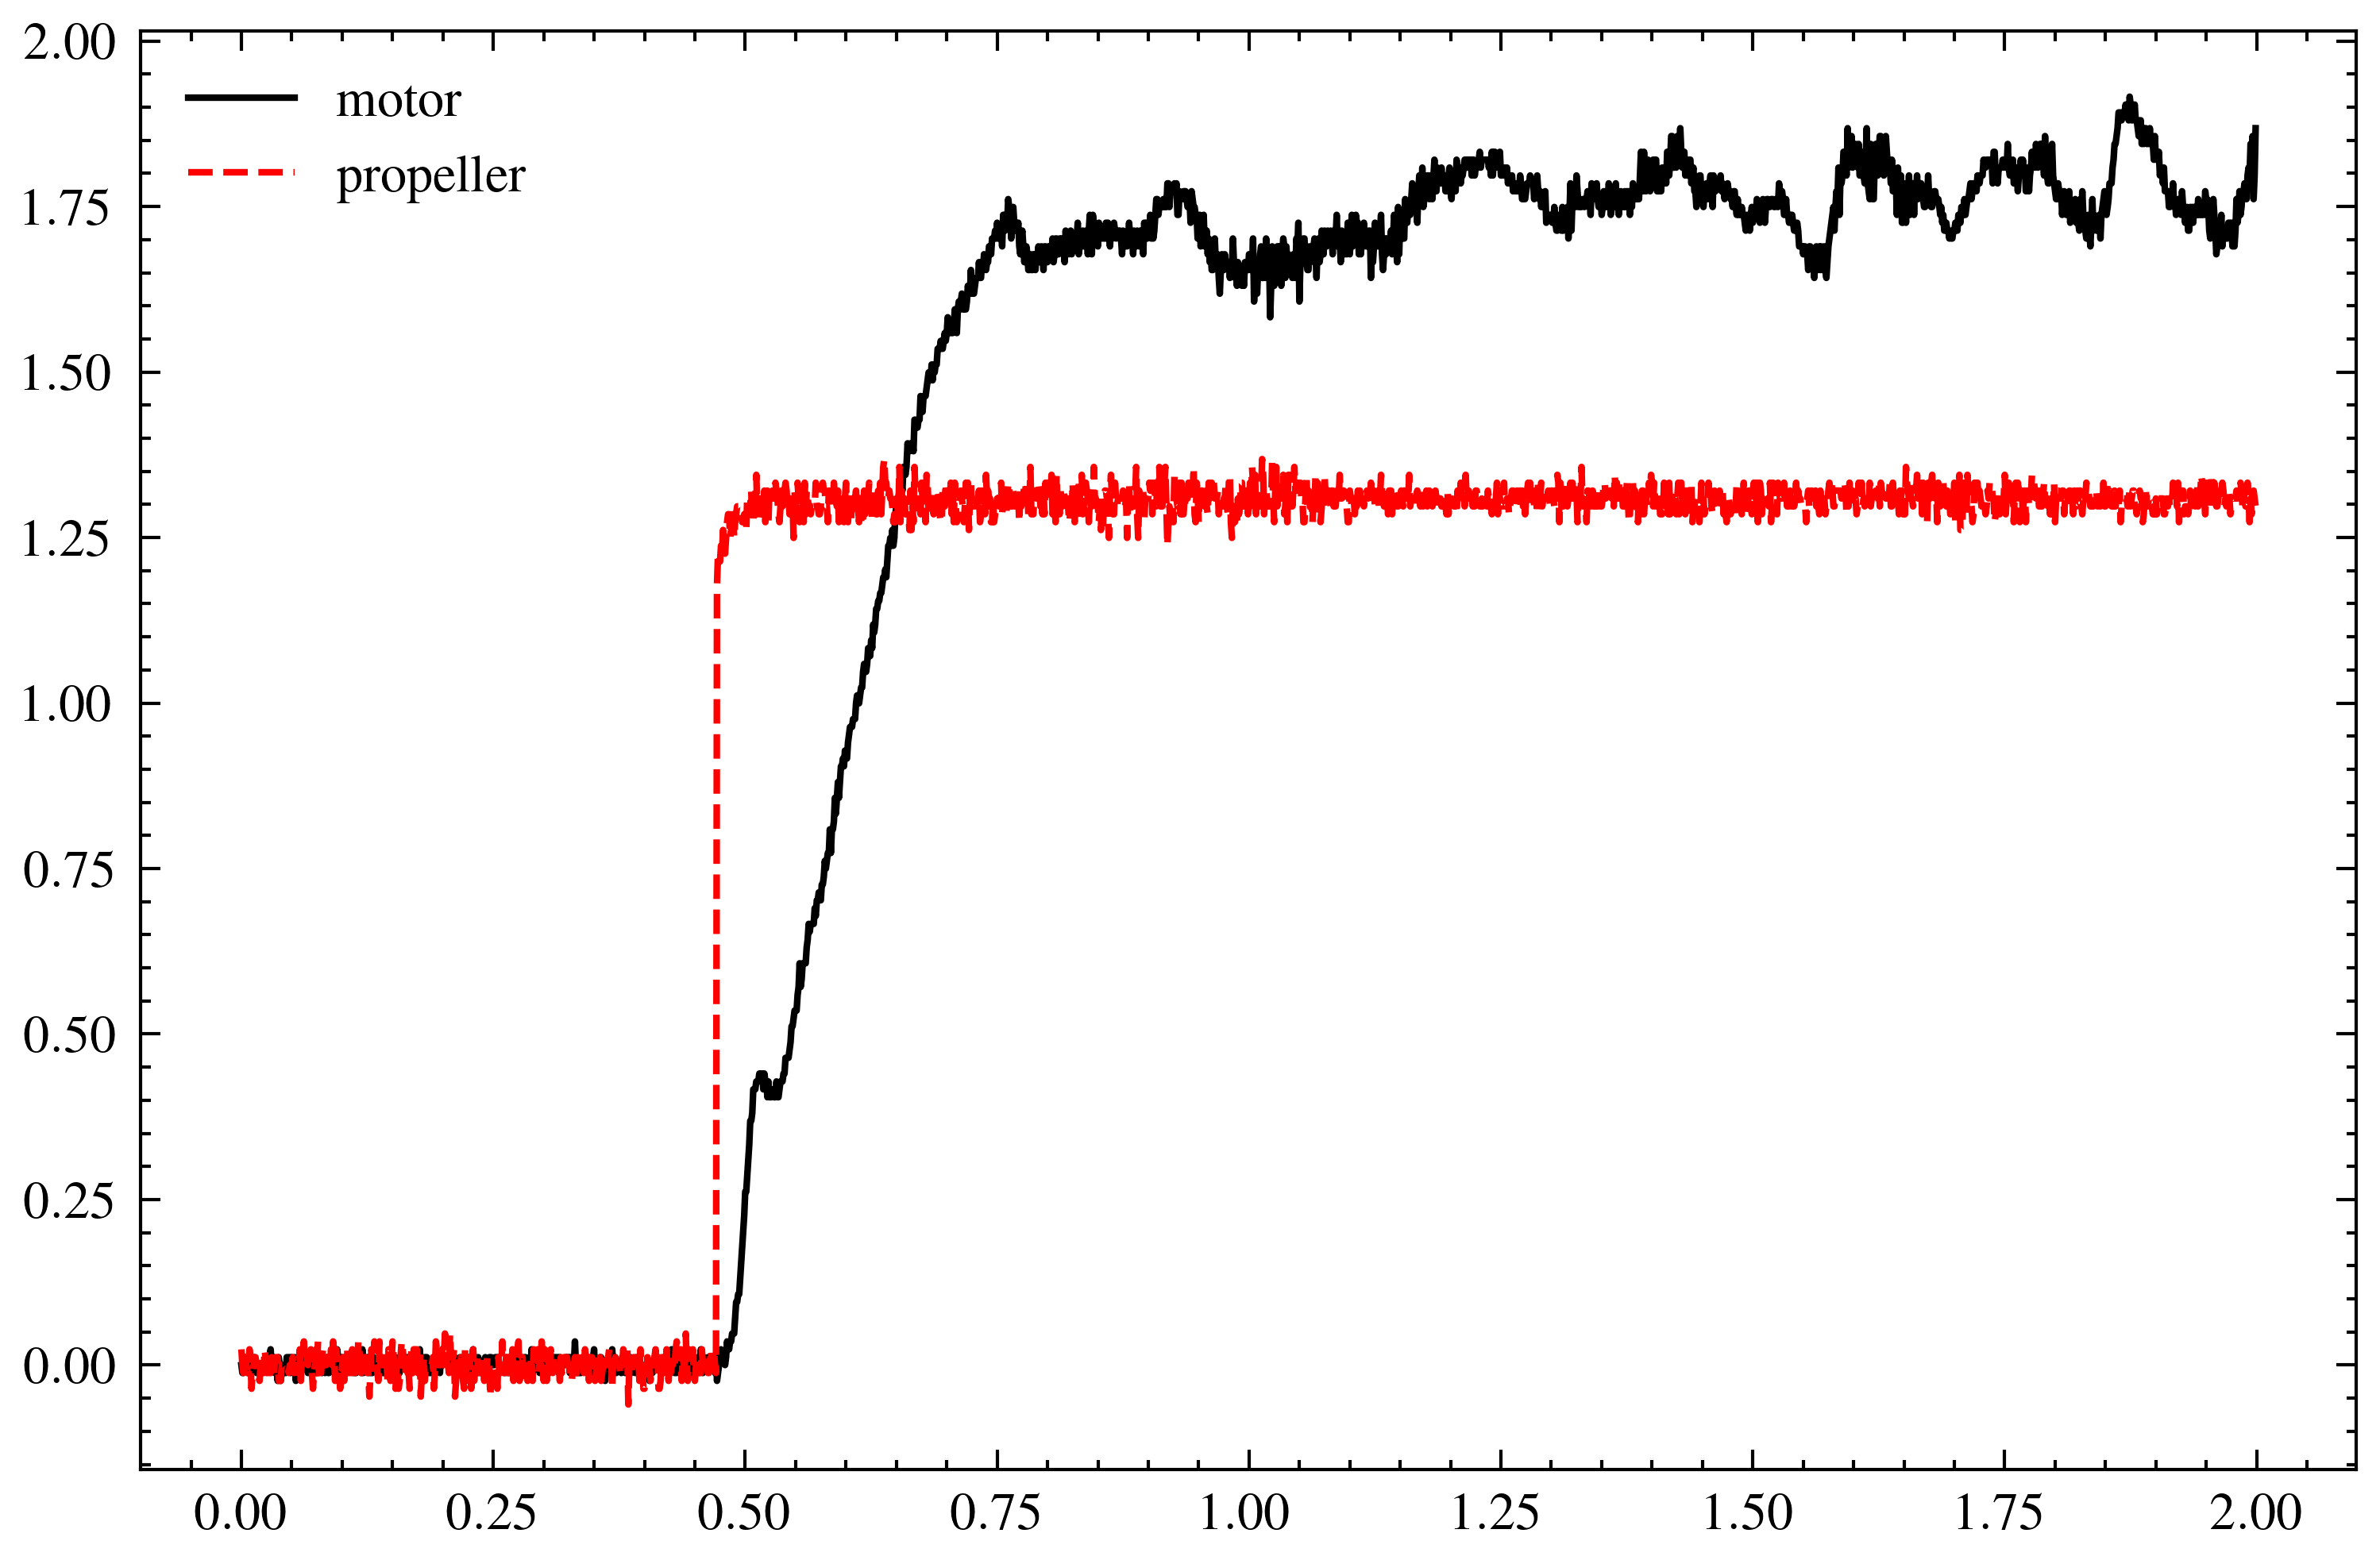

In [11]:
print(len(t_motor))
plt.plot(t_motor, tau_motor, label='motor')
plt.plot(t_motor, tau_propeller, label='propeller')
plt.legend()
plt.show()

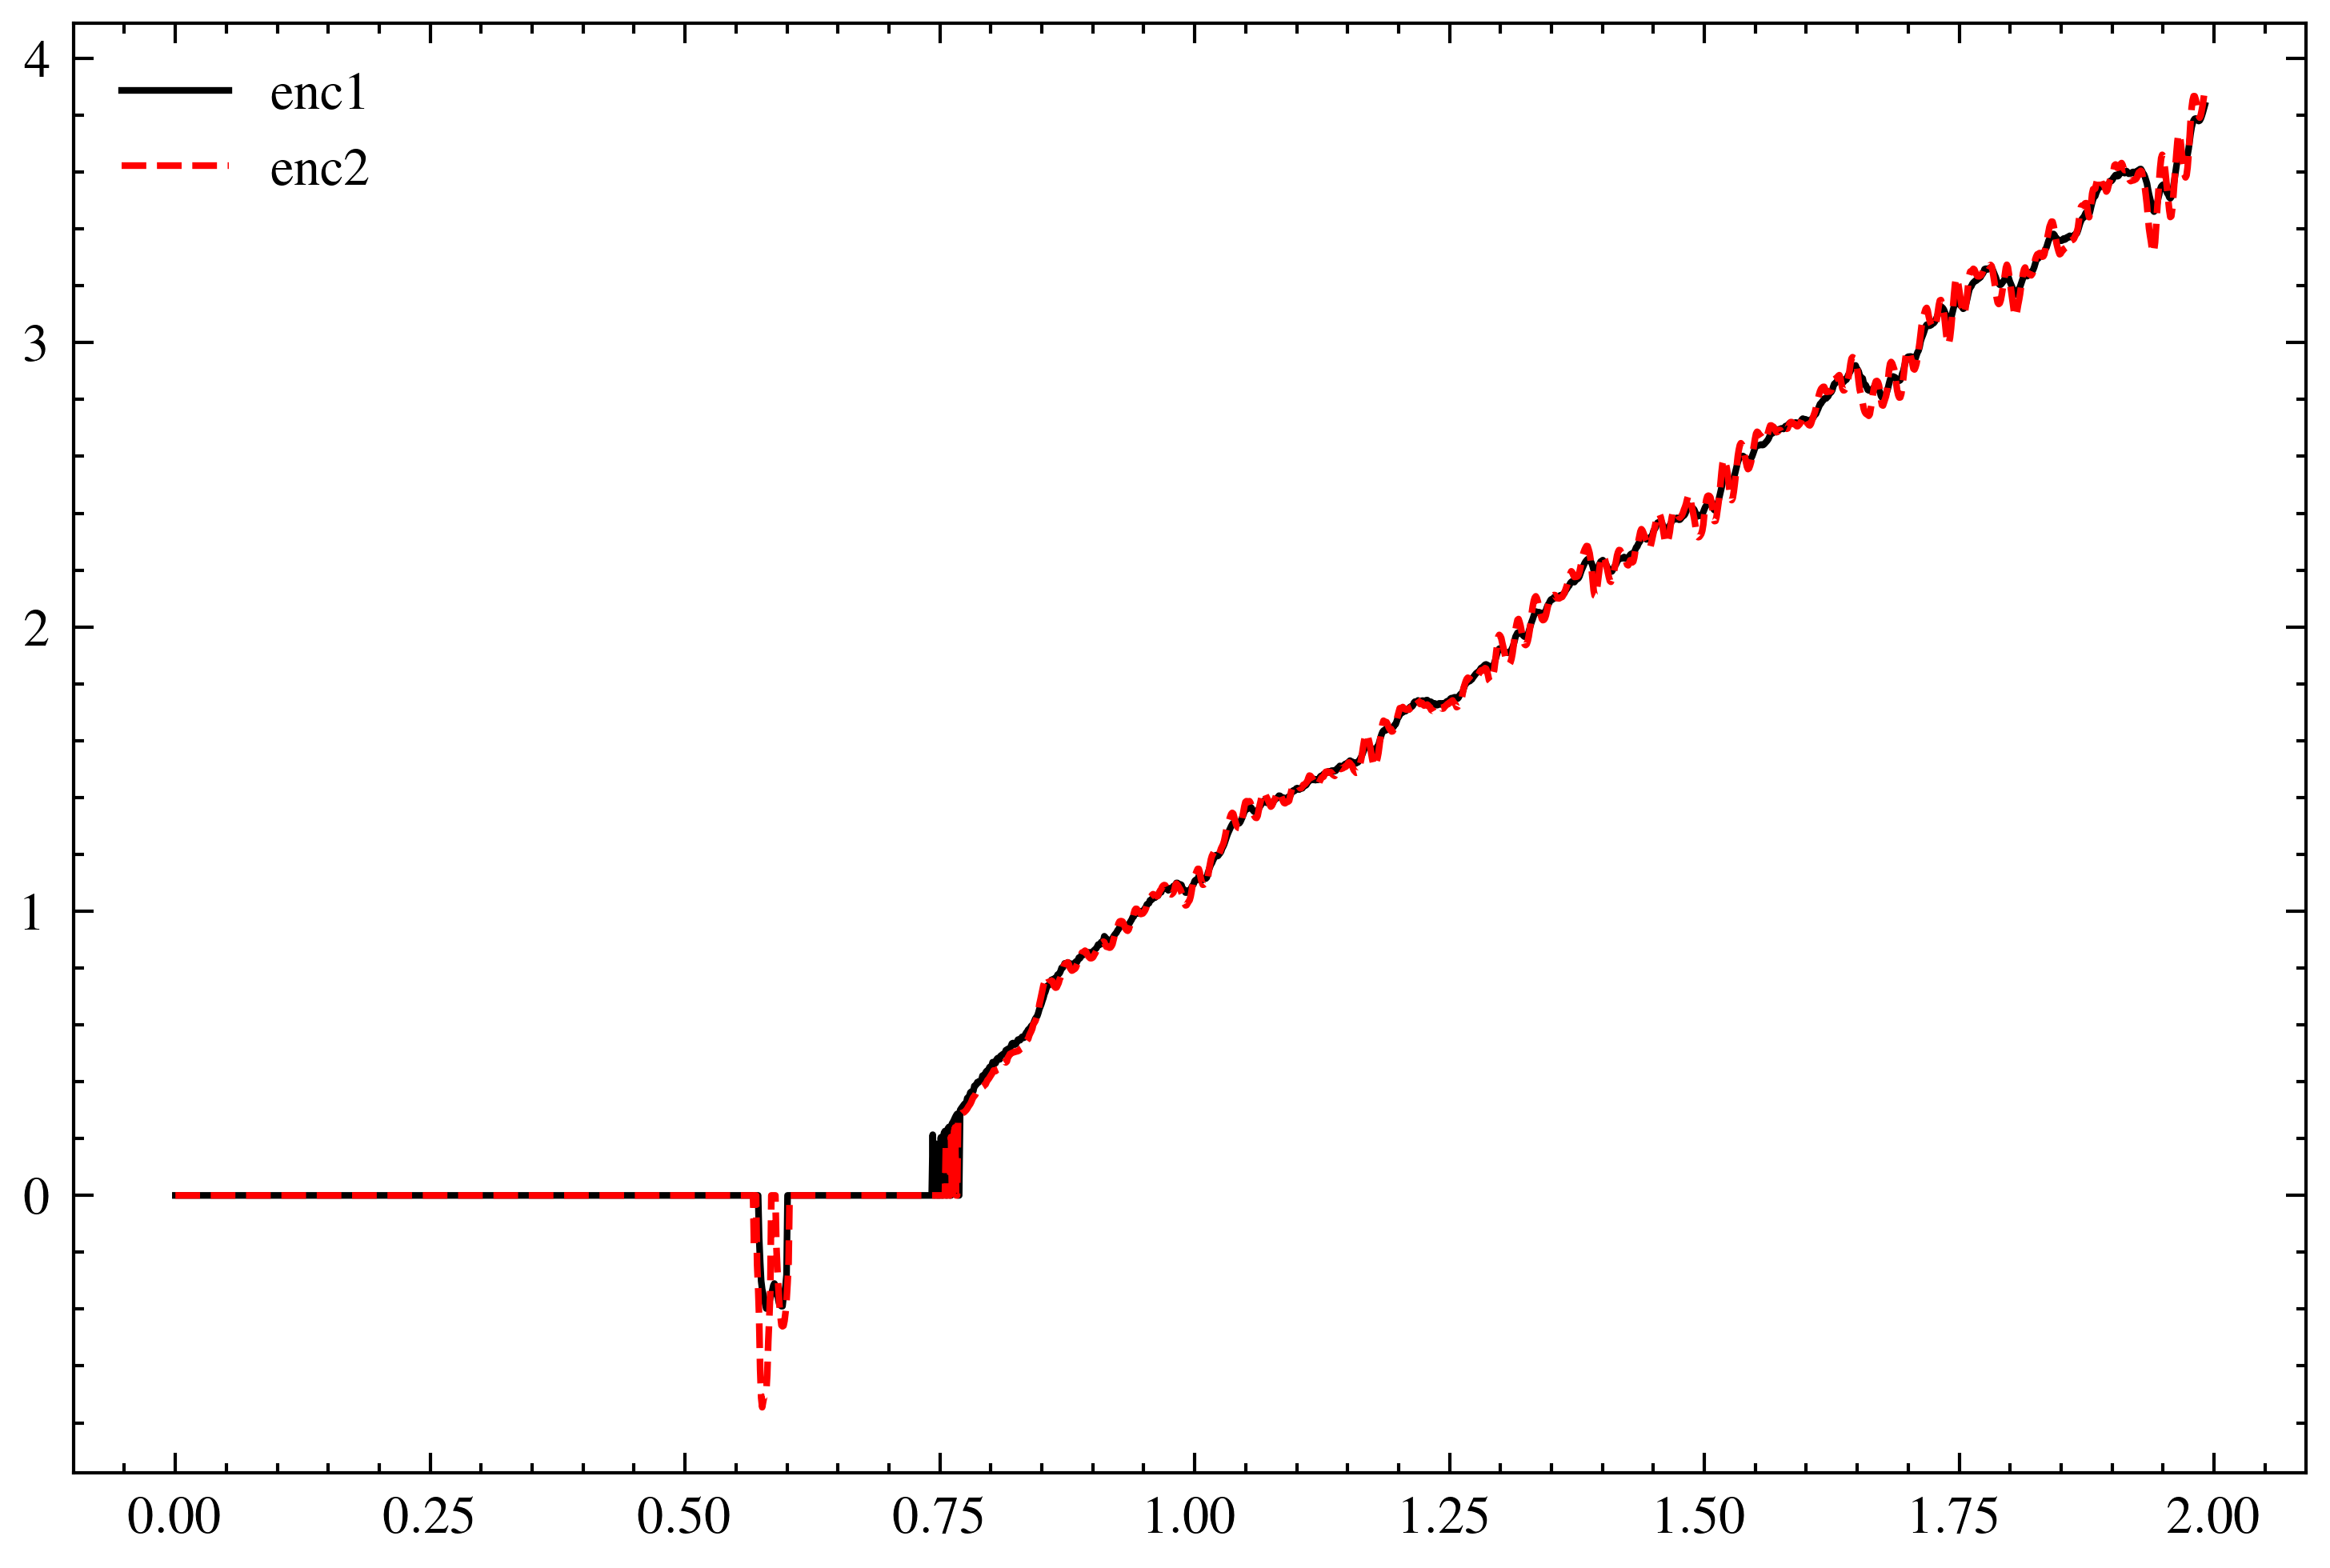

In [12]:
t_sensor = sensor_data[:,0]
omega1 = sensor_data[:,1]
omega2 = sensor_data[:,2]
omega3 = sensor_data[:,3]
omega4 = sensor_data[:,4]
omega5 = sensor_data[:,5]
torq1 = sensor_data[:,6]
torq2 = sensor_data[:,7]
plt.plot(t_sensor, omega1, label='enc1')
plt.plot(t_sensor, omega2, label='enc2')
#plt.plot(t_sensor, omega3, label='enc3')
#plt.plot(t_sensor, omega4, label='enc4')
#plt.plot(t_sensor, omega5, label='enc5')
plt.legend()
plt.show()

## Simulation with measured inputs

In [13]:
dt = np.mean(np.diff(t_motor))
motor_loads = np.vstack((tau_motor, tau_propeller)).T

A, B = c2d(Ac, Bc, dt)

In [14]:
t_out, y_out, x_out = dlsim((A, B, C, D, dt), t=t_motor, u=motor_loads)

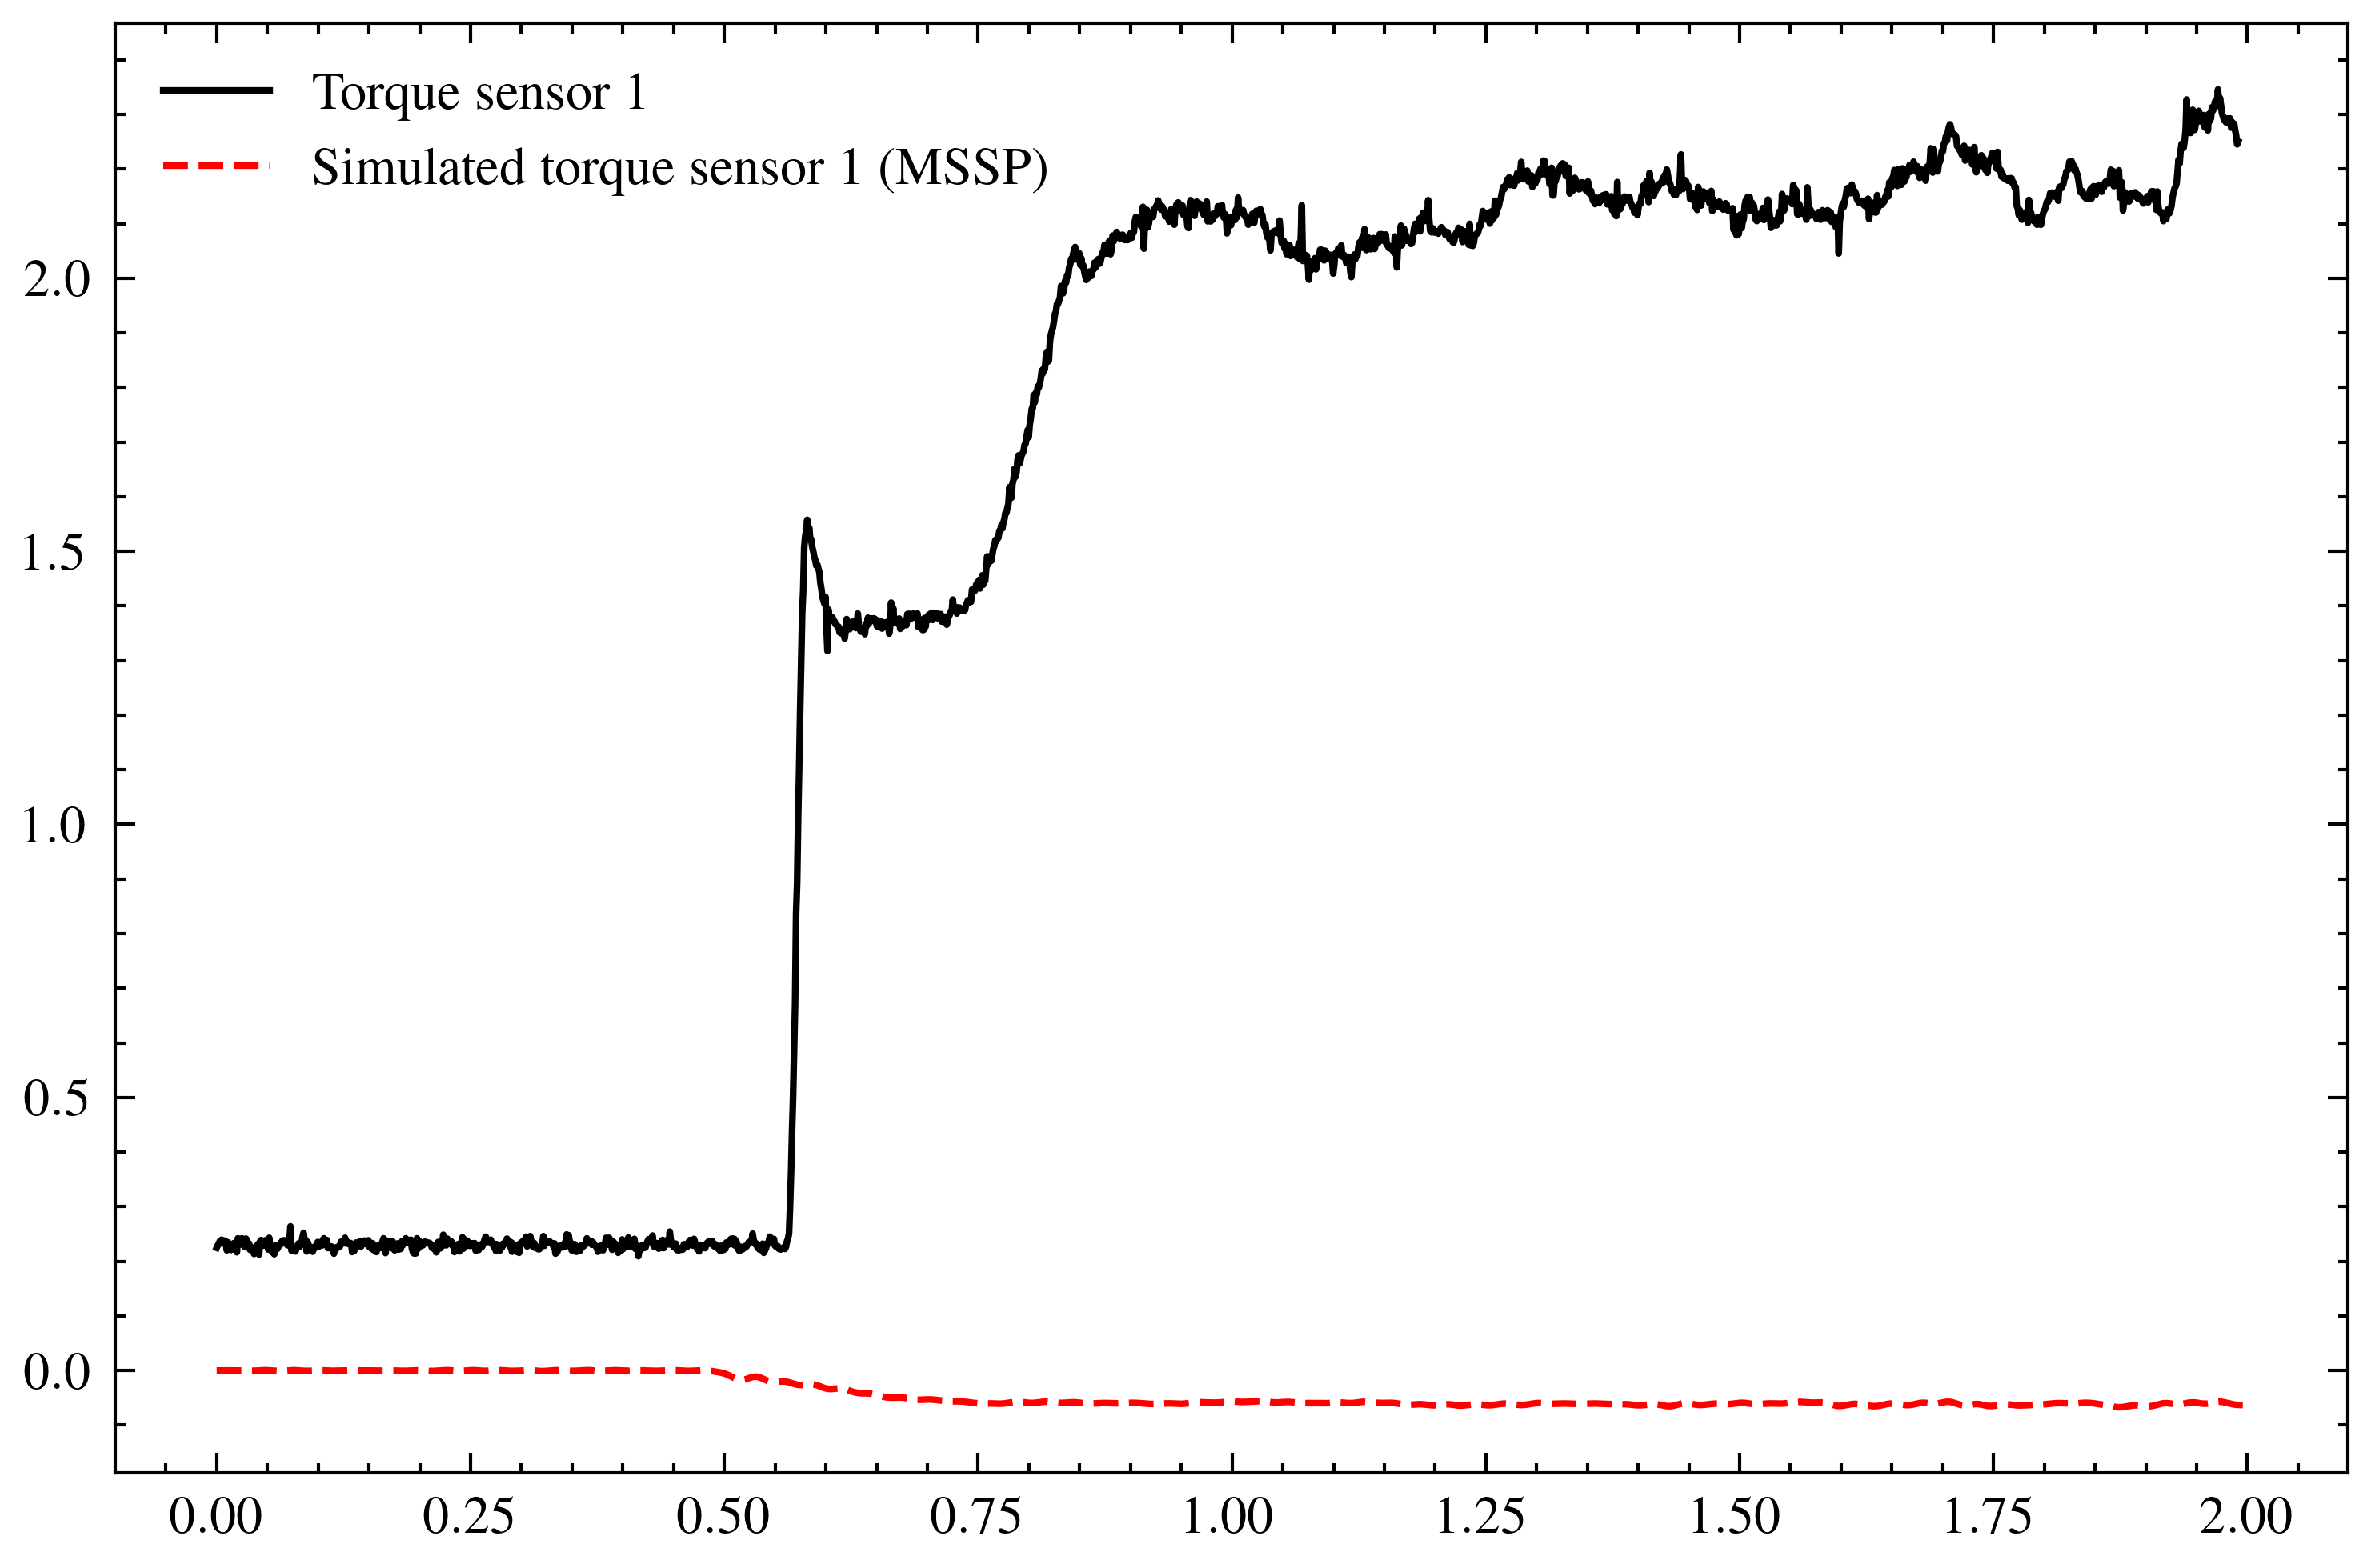

In [16]:
plt.plot(t_sensor, torq1, label='Torque sensor 1')
#plt.plot(t_sensor_third, torq2, label='Torque sensor 2', alpha=0.5)
plt.plot(t_out, 5400*(y_out[:,8]-y_out[:,7]), label='Simulated torque sensor 1 (MSSP)')
plt.legend()
plt.show()

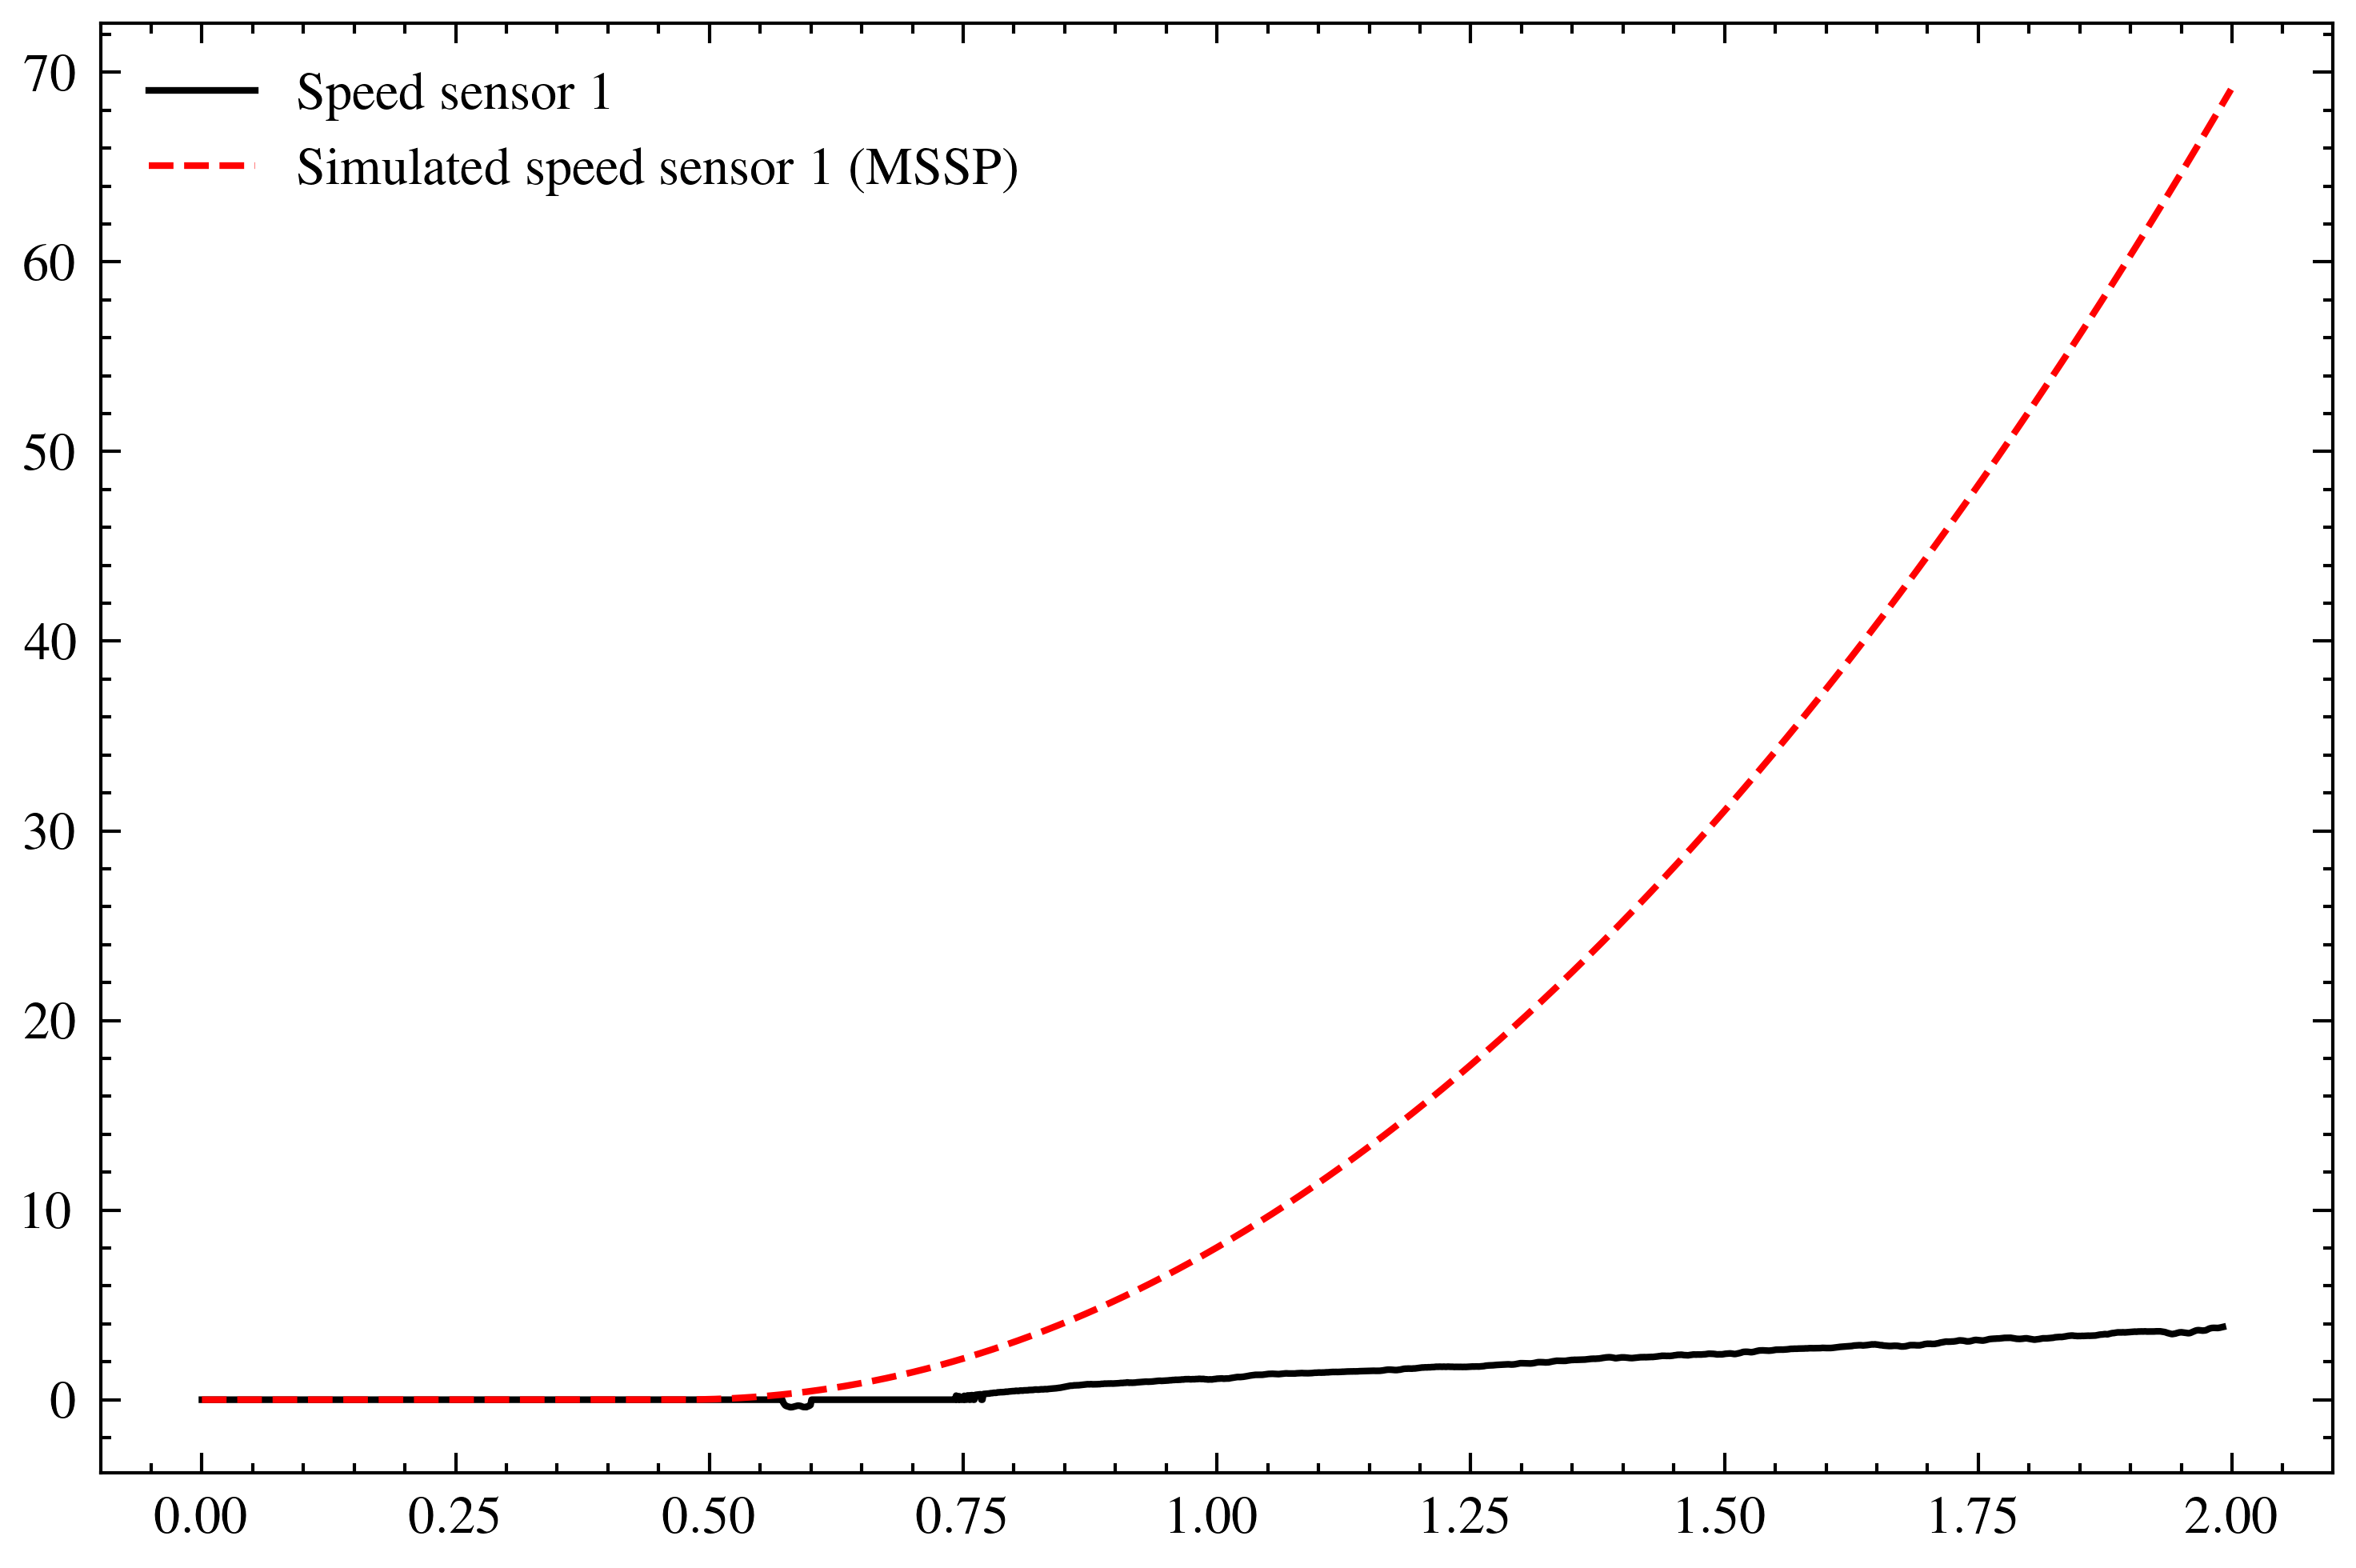

In [18]:
plt.plot(t_sensor, omega1, label='Speed sensor 1')
#plt.plot(t_out, y_out[:,0], label='Simulated speed sensor 1 (matlab)')
plt.plot(t_out, y_out[:,26], label='Simulated speed sensor 1 (MSSP)')
plt.legend()
plt.show()

In [ ]:
#def X(k_values, ndof):
#    """
#    Used to transform the state-matrix to be compatible with shaft torque as a state.
#    """
#    rows = ndof-1
#    cols = ndof
#    if len(k_values) != rows:
#        print("wrong amount of stiffness values / dofs")
#        return
#    
#    X_up = np.zeros((rows, cols))
#    X_down = np.eye(cols)
#    Z_up = np.zeros(X_up.shape)
#    Z_down = np.zeros(X_down.shape)
#    
#    for i in range(rows):
#        X_up[i,i] = -k_values[i]
#        X_up[i,i+1] = k_values[i]
#    
#    X_matrix = np.vstack([np.hstack([X_up, Z_up]), np.hstack([Z_down, X_down])])
#    
#    X_inv = X_matrix.T @ np.linalg.inv(X_matrix @ X_matrix.T)
#    
#    return X_matrix, X_inv

In [ ]:
#k_values = -np.diag(assembly.K(), 1)
#gear_correction = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1/3, 1, 1, 1, 1/4, 1, 1, 1])
#k_values *= gear_correction
#E, E_inv = X(k_values, 20)

#Act, Bct = E @ Ac @ E_inv, E @ Bc
#At, Bt = c2d(Act, Bct, dt)
#Ct = np.eye(Bt.shape[0])
#Dt = np.zeros((Ct.shape[0], Bt.shape[1]))

#tout, yout, xout = dlsim((At, Bt, Ct, Dt, dt), t=t_motor, u=mot_pot)

# Input and state estimation functions

In [ ]:
def O(A, C, n):
    '''
    Create the extended observability matrix used in the data equation.

    Parameters:

    A : numpy.ndarray
        The state matrix of the state-space system
    C : numpy.ndarray
        The observation matrix of the state-space system
    n : float
        number of measurements

    Returns:

    O : numpy.ndarray, shape(n, number of state variables)
        The extended observability matrix
    '''
    A_power = np.copy(A)
    O = np.vstack((np.copy(C), C @ A))
    
    for k in range(n-2):
        A_power = A_power @ A
        O = np.vstack((O, C @ A_power))

    return O

In [ ]:
def gamma(A, B, C, n):
    '''
    Create the impulse response matrix used in the data equation.

    Parameters:

    A : numpy.ndarray
        The state matrix of the state-space system
    B : numpy.ndarray
        The input matrix of the state-space system
    C : numpy.ndarray
        The observation matrix of the state-space system
    n : float
        number of measurements

    Returns:

    gamma : numpy.ndarray, shape(n*number of state variables, n*number of state variables)
        The impulse response matrix
    '''
    A_power = np.copy(A)
    Z = np.zeros((C @ B).shape)
    
    # first column
    gamma_column_first = np.vstack((
        Z,
        C @ B, 
        C @ A @ B
    ))
    for _ in range(n-3):
        A_power = A_power @ A
        gamma_column_first = np.vstack((gamma_column_first, C @ A_power @ B))

    # build complete matrix, column by column, from left to right
    gamma = np.copy(gamma_column_first)
    current_column = 1
    for _ in range(1, n):
        gamma_rows = Z
        
        # first add zero matrices
        for _ in range(current_column):
            gamma_rows = np.vstack((gamma_rows, Z))
        
        # then add the impulse responses
        A_power2 = np.copy(A)
        
        if current_column < (n-2):
            gamma_rows = np.vstack((
                gamma_rows,
                C @ B,
                C @ A @ B # these must not be added to the last and the second to last columns
            ))
            
        if current_column == (n-2):
            gamma_rows = np.vstack((
                gamma_rows,
                C @ B # this has to be added to the end of the second to last column
            ))
        
        for _ in range(n-current_column-3):
            A_power2 = A_power2 @ A
            gamma_rows = np.vstack((gamma_rows, C @ A_power2 @ B))

        # add column on the right hand side
        gamma = np.hstack((gamma, gamma_rows))
        current_column += 1
    
    return gamma

In [ ]:
def L(input_shape):
    '''
    The regularization matrix L.

    Parameters:

    input_shape : float
        Input vector shape used to determine L matrix shape.

    Returns:

    L : ndarray
        The regularization matrix
    '''
    I = np.eye(input_shape)
    L = -I + np.diag(np.ones(input_shape-1), 1)

    return I

In [ ]:
def second_difference_matrix(n, m):
    D2 = np.eye(n*m) - 2*np.eye(n*m, k=2) + np.eye(n*m, k=4)
    
    # delete incomplete rows
    D2 = D2[:-2*m, :]
    
    return D2

In [ ]:
def tikhonov_problem(meas, obsrv, gamm, regu, initial_state=None, lam=1, cmplx=False):
    '''
    This function uses the cvxpy library to solve a Tikhonov regularization problem.
    '''
    d = cp.Variable((gamm.shape[1], 1), complex=cmplx)
    
    if initial_state is None:
        x = cp.Variable((obsrv.shape[1], 1), complex=cmplx)
    else:
        x = initial_state
        
    measurements = cp.Parameter(meas.shape)
    measurements.value = meas
    
    objective = cp.Minimize(cp.sum_squares(measurements - obsrv @ x - gamm @ d) + lam * cp.sum_squares(regu @ d))
    
    prob = cp.Problem(objective)
    prob.solve()

    if initial_state is None:
        x_value = x.value
    else:
        x_value = initial_state

    return d.value, x_value

In [ ]:
def lasso_problem(meas, obsrv, gamm, regu, initial_state=None, lam=1, cmplx=False):
    '''
    This function uses the cvxpy library to solve a LASSO problem.
    '''
    d = cp.Variable((gamm.shape[1], 1), complex=cmplx)
    
    if initial_state is None:
        x = cp.Variable((obsrv.shape[1], 1), complex=cmplx)
    else:
        x = initial_state
        
    measurements = cp.Parameter(meas.shape)
    measurements.value = meas
    
    objective = cp.Minimize(cp.sum_squares(measurements - obsrv @ x - gamm @ d) + lam * cp.pnorm(regu @ d, 1))
    
    prob = cp.Problem(objective)
    prob.solve()
    
    if initial_state is None:
        x_value = x.value
    else:
        x_value = initial_state

    return d.value, x_value

## Input estimation

In [ ]:
measurements_noise = np.vstack((omega1, omega2, tau_motor, torq1)).T
print(measurements_noise.shape)

In [ ]:
c_mat = np.insert(C, 2, np.zeros((1, C.shape[1])), 0)
c_mat[2,22] += 1.9e5
print(c_mat.shape)

In [ ]:
m = B.shape[1]
n = len(t_sensor) # corresponds to datapoints in over a 2 second period (1 kHz sampling frequency)

bs = 500 # batch size
loop_len = int(n/bs)

D2_mat = second_difference_matrix(bs, m)
L_mat = L(bs*m)
O_mat = O(A, c_mat, bs)
G_mat = gamma(A, B, c_mat, bs)
x_tikhonov = np.zeros((O_mat.shape[1], 1))
x_lasso = np.zeros((O_mat.shape[1], 1))

tikh_estimates = []
lasso_estimates = []

In [ ]:
print(O_mat.shape)
print(B.shape)
print(m)
print(loop_len)

In [ ]:
# for initial state estimation
C_full = np.eye(B.shape[0])
omat = O(A, C_full, bs)
gmat = gamma(A, B, C_full, bs)

In [ ]:
for i in range(loop_len):
    batch = measurements_noise[i*bs:(i+1)*bs,:]
    y_noise = batch.reshape(-1,1)
    
    #print('Initial state estimate (Tikhonov):\n', x_tikhonov.T)
    #print('Initial state estimate (LASSO):\n', x_lasso.T)
    
    tikhonov_estimate, x_tikhonov = tikhonov_problem(y_noise, O_mat, G_mat, D2_mat, initial_state=x_tikhonov, lam=0.05)
    lasso_estimate, x_lasso = lasso_problem(y_noise, O_mat, G_mat, D2_mat, initial_state=x_lasso, lam=0.05)
    
    x_est_t = omat @ x_tikhonov + gmat @ tikhonov_estimate
    x_tikhonov = x_est_t[-A.shape[0]:,:]
    
    x_est_l = omat @ x_lasso + gmat @ lasso_estimate
    x_lasso = x_est_l[-A.shape[0]:,:]
    
    #print('New initial state estimate (Tikhonov):\n', x_tikhonov.T)
    #print('New initial state estimate (LASSO):\n', x_lasso.T)
    
    tikh_estimates.append(tikhonov_estimate)
    lasso_estimates.append(lasso_estimate)

In [ ]:
for i in range(loop_len):
    plt.plot(t_motor[i*bs:(i+1)*bs], tau_motor[i*bs:(i+1)*bs], linestyle='solid', color='black')
    plt.plot(t_sensor_third[i*bs:(i+1)*bs], tikh_estimates[i][::2], linestyle='dotted', alpha=0.2, color='red')
    plt.plot(t_sensor_third[i*bs:(i+1)*bs], lasso_estimates[i][::2], linestyle='dashed', color='blue')

plt.legend(('known input', 'Tikhonov estimate', 'LASSO estimate'))
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.title('Motor side input estimates (H-P trend filtering)')
#plt.ylim(4.95, 5.05)
#plt.xlim(0.4,0.6)
plt.show()

In [ ]:
%matplotlib widget
for i in range(loop_len):
    plt.plot(t_motor[i*bs:(i+1)*bs], tau_propeller[i*bs:(i+1)*bs], linestyle='solid', color='black')
    plt.plot(t_sensor_third[i*bs:(i+1)*bs], tikh_estimates[i][1::2], linestyle='dotted', alpha=0.5, color='red')
    plt.plot(t_sensor_third[i*bs:(i+1)*bs], lasso_estimates[i][1::2], linestyle='dashed', color='blue')

plt.legend(('known input', 'Tikhonov estimate', 'LASSO estimate'))
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.title('Propeller side input estimates (H-P trend filtering)')
#plt.ylim(-4, 0)
#plt.xlim(0.4,0.6)
plt.show()

In [ ]:
step_excitation = np.vstack((t_motor[:2000], tau_motor[:2000], tau_propeller[:2000])).T
step_response = np.vstack((t_sensor_third[:2000], omega1[:2000], omega2[:2000], omega3[:2000], omega4[:2000], omega5[:2000], torq1[:2000], torq2[:2000])).T
print(step_response.shape)